In [180]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [181]:
# At the time of writing this script, there were no official datasets available
# mv_covid19nodes.csv and mv_covid19edges.csv were populated manually based on HPA tweets
# Lack of consistency in HPA tweets acts as a challenge to scrape it off Twitter

df_nodes = pd.read_csv('mv_covid19nodes.csv')
df_edges = pd.read_csv('mv_covid19edges.csv')

In [182]:
G = nx.Graph()
G.add_nodes_from(df_nodes['Nodes'])

In [183]:
edges_as_tuples = list(df_edges.to_records(index=False))
G.add_edges_from(edges_as_tuples)

In [184]:
d = nx.degree(G)
node_sizes = []
for i in d:
    _, value = i
    node_sizes.append(value)

In [185]:
node_list = list(G.nodes())
angle = []

for i in range(len(node_list)):
    theta = 2.0*np.pi*i/(len(node_list))
    angle.append((np.cos(theta),np.sin(theta)))

    
angle_dict = {}
for i in range(len(node_list)):
    theta = 2.0*np.pi*i/(len(node_list))
    angle_dict[node_list[i]] = theta

In [186]:
pos = {}

for node_i, node in enumerate(node_list):
    pos[node] = angle[node_i]

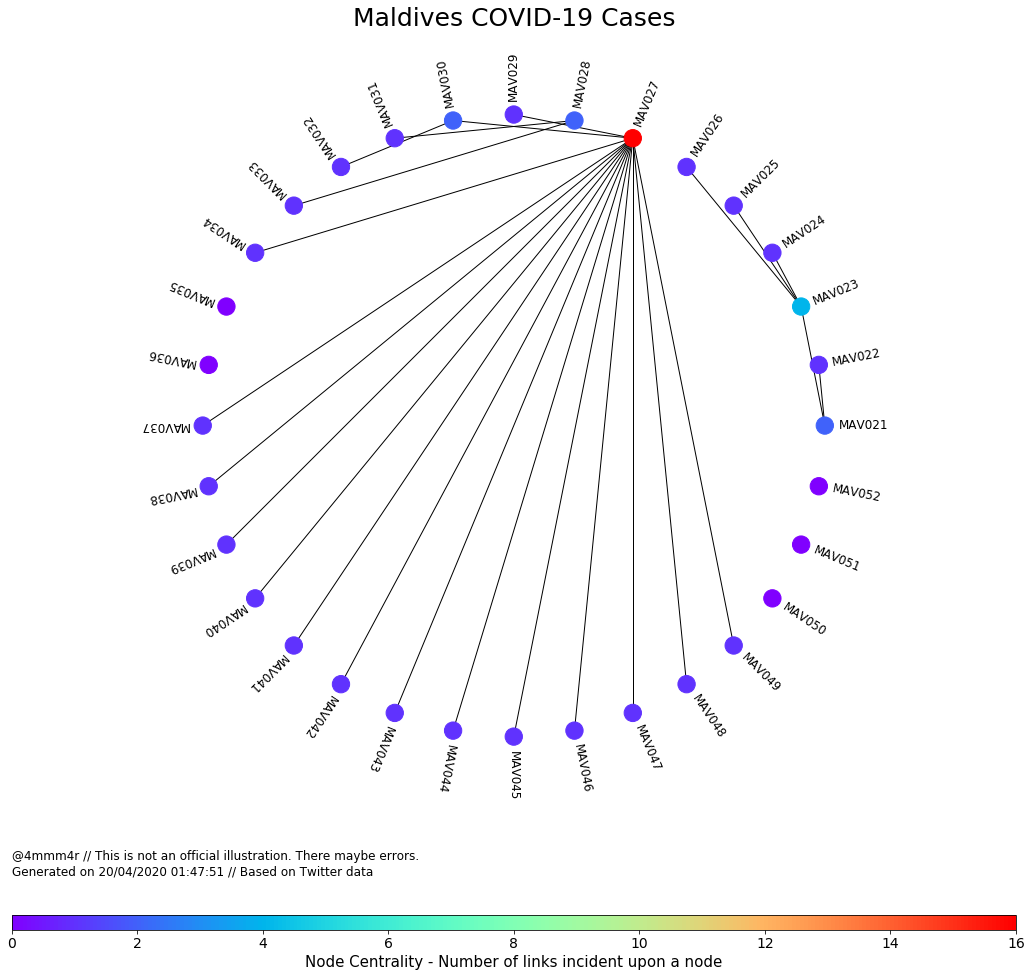

In [187]:
colormap = plt.cm.rainbow
sm = plt.cm.ScalarMappable(cmap = colormap,
                           norm = plt.Normalize(vmin=min(node_sizes), vmax=max(node_sizes)))

fig, ax = plt.subplots(figsize=(18,18))


sm.set_array([])


sm.set_array([])
margin = 0.33
ax.axis('equal')

nx.draw(G,
        pos= pos,
        with_labels = False, 
        ax = ax,
        #node_size=20,
        node_color = node_sizes,
        cmap = colormap, 
        vmin = min(node_sizes), 
        vmax = max(node_sizes),)

description = nx.draw_networkx_labels(G,pos)

cbar = plt.colorbar(sm,
                    aspect = 67,
                   orientation='horizontal',
                   )

cbar.set_label(label = 'Node Centrality - Number of links incident upon a node', fontsize=15)

cbar.ax.tick_params(labelsize=14) 

# Credits to Stackoverflow (https://stackoverflow.com/a/43912385) for this solution to getting labels at angles

r = fig.canvas.get_renderer()
trans = plt.gca().transData.inverted()
for node, t in description.items():
    bb = t.get_window_extent(renderer=r)
    bbdata = bb.transformed(trans)
    radius = 1.07+bbdata.width/2.
    position = (radius*np.cos(angle_dict[node]),radius* np.sin(angle_dict[node]))
    t.set_position(position)
    t.set_rotation(angle_dict[node]*360.0/(2.0*np.pi))
    t.set_clip_on(False)

ax.set_title('Maldives COVID-19 Cases',
             fontsize= 25,
             pad=57
            )
now = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
plt.annotate(f'@4mmm4r // This is not an official illustration. There maybe errors. \nGenerated on {now} // Based on Twitter data', 
             (0,-0.12), 
             (0, 0), 
             xycoords='axes fraction', 
             textcoords='offset points', va='top',
            fontsize=12)

plt.show()
newnow = datetime.now().strftime('%d%m%Y_%H%M%S')
fig.savefig(f'Plot_on_{newnow}.png', bbox_inches = 'tight', pad_inches = 0, dpi=200)
            